In [41]:
# Data manipulation and analysis
import numpy as np
import pandas as pd
from collections import Counter

# Data visualization
import matplotlib.pyplot as plt
from matplotlib.backends.backend_tkagg import FigureCanvasTkAgg
from matplotlib.patches import PathPatch
from matplotlib.colors import LinearSegmentedColormap
import seaborn as sns

# ECG processing
import wfdb
import neurokit2 as nk
from neurokit2 import ecg

# Operating system and file manipulation
import os
import tkinter as tk
from tkinter import ttk

#Import custom module
from read_record import RecordReader, Record


In [25]:
def analyze_ecg(signal,sampling_freq):
    cleaned = nk.ecg_clean(signal, sampling_rate=sampling_freq)
    ecg, info=nk.ecg_process(cleaned)
    avg_heart_rate=np.mean(ecg['ECG_Rate'])
    return ecg,info,avg_heart_rate

In [3]:
def plot_signal_with_annotation(signal, annotation_symbols, 
                                annotation_indices, sampling_freq, 
                                ann_style='r.', figsize=(15,6)):
    
    #create time axis
    time=np.arange(len(signal))/sampling_freq
    pvc_percentage=100*(Counter(annotation_symbols)['V']/Counter(annotation_symbols)['N'])
    pac_percentage=100*(Counter(annotation_symbols)['A']/Counter(annotation_symbols)['N'])
    
    plt.figure(figsize=figsize)
    plt.plot(time,signal)
    plt.xlabel("Time(s)")
    plt.xlim(0,time[-1]) 
    plt.ylabel("Amplitube (mV)")
    
    plt.text(0.5, -0.23,f"PVC Percentage:{pvc_percentage:.2f} \nPAC Percentage:{pac_percentage:.2f}",
             transform=plt.gca().transAxes, ha='center',fontsize=12)
    
    
    for idx, symbol in zip(annotation_indices, annotation_symbols):
        plt.plot(idx/sampling_freq, signal[idx], ann_style)
        plt.annotate(symbol, (idx/sampling_freq, signal[idx]), xytext=(4,5), textcoords='offset pixels')
    
    plt.legend('')
    plt.show()

In [ ]:
def choose_ecg_record(folder_path):
    """
    Allows the user to choose an ECG file from the specified folder.

    Args:
        folder_path (str): Path to the folder containing ECG files.

    Returns:
        str: Selected ECG file name (without extension).
    """
    
    # List all files in the specified folder
    files = os.listdir(folder_path)
    # Create a list of base filenames (without the '.hea' extension) for ECG signal files
    hea_files = [f[:-4] for f in files if f.endswith(".hea")]
    
    # Create the main window
    root = tk.Tk()
    root.title("Select the ECG record")
    
    # Dropdown menu
    clicked = tk.StringVar()
    clicked.set("Select an ECG file")
    drop = ttk.Combobox(root, textvariable=clicked, values=hea_files)
    drop.pack()
    
    # Type time range
    tk.Label(root, text="Enter time range (s):").pack()
    time_from = tk.Entry(root)
    time_from.pack()
    time_to = tk.Entry(root)
    time_to.pack()
    
    def show():
        selected_file = clicked.get()
        label.config(text=f"Selected ECG file: {selected_file}")
        
        record = wfdb.rdrecord(os.path.join(folder_path, selected_file))
        sampling_frequency = record.fs
        samp_from = sampling_frequency * int(time_from.get())
        samp_to = samp_from + (int(time_to.get()) * sampling_frequency)
        
        physical_signal = record.p_signal[int(samp_from):int(samp_to), 0]
        
        annotation = wfdb.rdann(os.path.join(folder_path, selected_file), 'atr',
                                  sampfrom=samp_from, sampto=samp_to, shift_samps=True)
        symbol = annotation.symbol
        indices = annotation.sample
        
        plot_signal_with_annotation(signal=physical_signal,
                                    annotation_symbols=symbol,
                                    annotation_indices=indices,
                                    sampling_freq=sampling_frequency,
                                    ann_style='r.', figsize=(15,6))
        
        
    
    # Button to display the selected file
    button = tk.Button(root, text="Show Selected File", command=show)
    button.pack()

    # Label to display the selected file
    label = tk.Label(root, text="")
    label.pack()

    root.mainloop()

In [44]:
folder_path = "D:/CPSC2021/Training_set_I"
record_name="data_1_7"
#choose_ecg_record(folder_path)

In [5]:
#Reading the record with default wfdb library
record=wfdb.rdrecord("D:\\CPSC2021\\Training_set_I\\data_1_7")
record.__dict__

{'record_name': 'data_1_7',
 'n_sig': 2,
 'fs': 200,
 'counter_freq': None,
 'base_counter': None,
 'sig_len': 584812,
 'base_time': None,
 'base_date': None,
 'comments': ['non atrial fibrillation'],
 'sig_name': ['I', 'II'],
 'p_signal': array([[-0.00120646,  0.00632499],
        [-0.00241292,  0.00373749],
        [ 0.00422261, -0.00546249],
        ...,
        [-0.00693715,  0.00431249],
        [-0.00663554,  0.00661249],
        [-0.01146138,  0.00804999]]),
 'd_signal': None,
 'e_p_signal': None,
 'e_d_signal': None,
 'file_name': ['data_1_7.dat', 'data_1_7.dat'],
 'fmt': ['16', '16'],
 'samps_per_frame': [1, 1],
 'skew': [None, None],
 'byte_offset': [None, None],
 'adc_gain': [3315.481058676787, 3478.267175579841],
 'baseline': [-7341, -10815],
 'units': ['mV', 'mV'],
 'adc_res': [16, 16],
 'adc_zero': [0, 0],
 'init_value': [-7345, -10793],
 'checksum': [35138, 11826],
 'block_size': [0, 0]}

In [6]:
#Read the annotation file of the record with default wfdb
ann=wfdb.rdann("D:\\CPSC2021\\Training_set_I\\data_1_7",'atr')
ann.__dict__

{'record_name': 'data_1_7',
 'extension': 'atr',
 'sample': array([    30,    253,    476, ..., 584317, 584534, 584783], dtype=int64),
 'symbol': ['N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'A',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'A',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'A',
  'A',
  'N',
  'N',
  'N',
  'N',
  'V',
  'N',
  'V',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
 

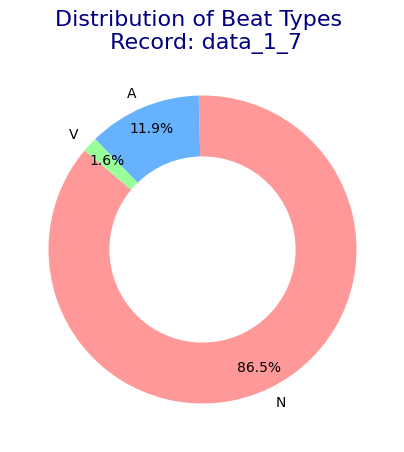

In [8]:
record_name="data_1_7"
beat_counts = Counter(ann.symbol)
labels = list(beat_counts.keys())
sizes = list(beat_counts.values())

# Soft pastel colors
colors = ['#FF9999', '#66B2FF', '#99FF99', '#FFCC99', '#FFD700', '#FFB6C1', '#C2B280', '#FF6347', '#20B2AA', '#BA55D3']

fig, ax = plt.subplots(figsize=(5, 5))

ax.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140, pctdistance=0.85, colors=colors)
ax.add_artist(plt.Circle((0, 0), 0.60, color='white'))  # Add a circle at the center to create a hole
ax.set_aspect('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title(f'Distribution of Beat Types \n Record: {record_name}', fontsize=16, color='navy')
plt.show()

In [40]:
ecg,info,avg_hr=analyze_ecg(record.p_signal[:,0],record.fs)
print(f"The average heart rate of the Record {record_name} : {avg_hr:.2f}")

The average heart rate of the Record data_1_7 : 115.76


In [26]:
ecg

,ECG_Raw,ECG_Clean,ECG_Rate,ECG_Quality,ECG_R_Peaks,ECG_P_Peaks,ECG_P_Onsets,ECG_P_Offsets,ECG_Q_Peaks,ECG_R_Onsets,ECG_R_Offsets,ECG_S_Peaks,ECG_T_Peaks,ECG_T_Onsets,ECG_T_Offsets,ECG_Phase_Atrial,ECG_Phase_Completion_Atrial,ECG_Phase_Ventricular,ECG_Phase_Completion_Ventricular
0,-0.015337,-0.018633,114.705475,0.984225,0,0,0,0,0,0,0,0,0,0,0,NaN,0.0,NaN,0.0
1,-0.012266,-0.018499,114.705475,0.984225,0,0,0,0,0,0,0,0,0,0,0,NaN,0.0,NaN,0.0
2,-0.009100,-0.018394,114.705475,0.984225,0,0,0,0,0,0,0,0,0,0,0,NaN,0.0,NaN,0.0
3,-0.006198,-0.018324,114.705475,0.984225,0,0,0,0,0,0,0,0,0,0,0,NaN,0.0,NaN,0.0
4,-0.003295,-0.018249,114.705475,0.984225,0,0,0,0,0,0,0,0,0,0,0,NaN,0.0,NaN,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
584807,-0.005925,-0.003403,129.589633,0.000000,0,0,0,0,0,0,0,0,0,0,0,NaN,0.0,NaN,0.0
584808,-0.006340,-0.003412,129.589633,0.000000,0,0,0,0,0,0,0,0,0,0,0,NaN,0.0,NaN,0.0
584809,-0.007109,-0.003415,129.589633,0.000000,0,0,0,0,0,0,0,0,0,0,0,NaN,0.0,NaN,0.0
584810,-0.008119,-0.003407,129.589633,0.000000,0,0,0,0,0,0,0,0,0,0,0,NaN,0.0,NaN,0.0


In [28]:
info

{'method_peaks': 'neurokit',
 'method_fixpeaks': 'None',
 'ECG_R_Peaks': array([   306,    754,   1189, ..., 583666, 584122, 584585]),
 'ECG_R_Peaks_Uncorrected': array([   306,    754,   1189, ..., 583666, 584122, 584585]),
 'ECG_fixpeaks_ectopic': [16, 280, 423],
 'ECG_fixpeaks_missed': [255,
  279,
  350,
  368,
  650,
  788,
  884,
  1018,
  1036,
  1045,
  1056,
  1068,
  1097],
 'ECG_fixpeaks_extra': [],
 'ECG_fixpeaks_longshort': [48,
  60,
  61,
  75,
  87,
  100,
  144,
  171,
  218,
  377,
  778,
  780,
  789,
  859,
  869,
  944,
  979],
 'ECG_fixpeaks_method': 'kubios',
 'ECG_fixpeaks_rr': array([0.52923822, 0.448     , 0.435     , ..., 0.453     , 0.456     ,
        0.463     ]),
 'ECG_fixpeaks_drrs': array([-0.00167828, -1.64449847, -0.3030303 , ...,  0.08271299,
         0.04909984,  0.11965812]),
 'ECG_fixpeaks_mrrs': array([ 1.47494108, -0.07155635, -0.66189624, ..., -0.42582418,
        -0.14553015,  0.07478632]),
 'ECG_fixpeaks_s12': array([-1.64449847, -0.3030303 ,

In [48]:
#Reading the record and the annotation of the record with custom module
reading_record=RecordReader.read(folder_path,record_name,0,0,None)
reading_record

In [49]:
reading_record.__dict__

{'_Record__parent': 'data_1_7',
 '_Record__signal': array([-0.00120646, -0.00241292,  0.00422261, ..., -0.00693715,
        -0.00663554, -0.01146138]),
 '_Record__symbol': ['N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'A',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'A',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'A',
  'A',
  'N',
  'N',
  'N',
  'N',
  'V',
  'N',
  'V',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  '